# Regression on the [Abalone](http://archive.ics.uci.edu/ml/datasets/Abalone) dataset using SVM with Python's Scikit-Learn
by [Zahra Taheri](https://github.com/zata213/Applied_Machine_Learning_S20_Assignments) (3 July 2020)

### Import libraries

In [1]:
#For some basic operations
import numpy as np
import pandas as pd

#For visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
import seaborn as sns

import dabl

# to make this notebook's output identical at every run
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
data=pd.read_csv('abalone.csv')
data.shape

(4177, 9)

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## Descriptive statistics and data visualizations

In [5]:
#Describe the dataset

data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
#Check the no. of unique items in each categorical column

data.select_dtypes('object').nunique()

Sex    3
dtype: int64

In [7]:
# Percentage of missing data in each column

number_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/number_of_columns
print(percentage_of_missing_data)

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64


In [8]:
data['age'] = data['Rings']+1.5
data.drop('Rings', axis = 1, inplace = True)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


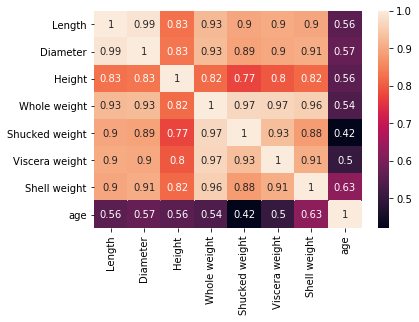

In [9]:
# Correlations

sns.heatmap(data.corr(), annot = True)

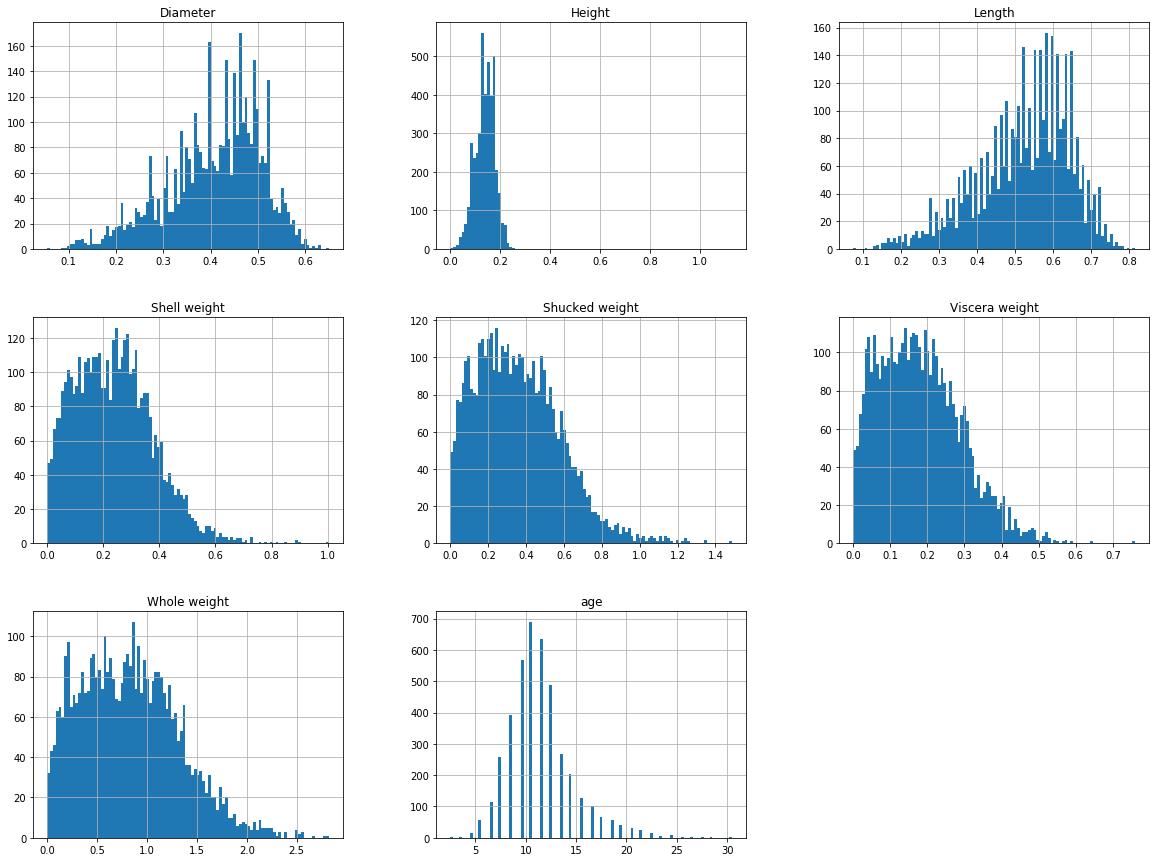

In [10]:
data.hist(bins=100, figsize=(20,15))

plt.show()

Target looks like regression


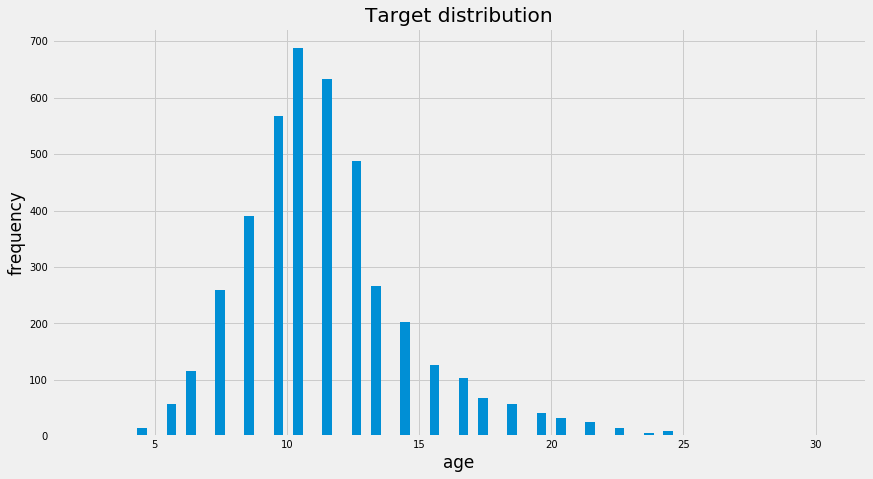

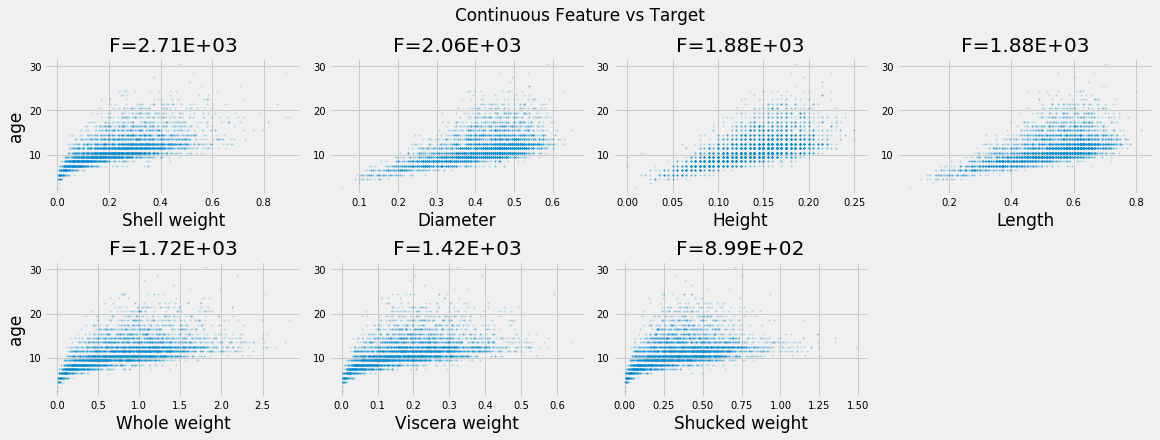

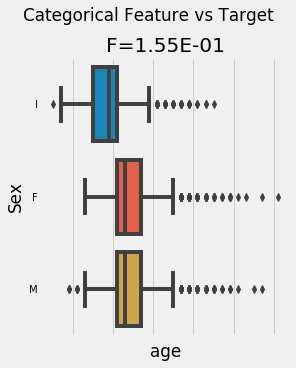

In [11]:
plt.rcParams['figure.figsize'] = (13,7)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'age')

In [12]:
#Preprocess the categorical input feature, `Sex`:
data_cat = data[["Sex"]]
data_cat.head(10)

,Sex
0,M
1,M
2,F
3,M
4,I
5,I
6,F
7,F
8,M
9,F


In [13]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[:10]

array([[2.],
       [2.],
       [0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.]])

In [14]:
data["Sex"]=data_cat_encoded
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [15]:
X=data.iloc[:,:8].values
y=data.iloc[:,8].values
print(data.shape)
print(X.shape)
print(y.shape)

(4177, 9)
(4177, 8)
(4177,)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler

std_scale =StandardScaler()

X_train=std_scale.fit_transform(X_train)
X_test=std_scale.fit_transform(X_test)

## Train and test Support vector machine models

In [18]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [19]:
svm_reg = SVR(C=1, kernel="linear" )
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, rmse)

RMSE of  SVR 2.271013300106978


In [20]:
svm_reg = SVR(C=1, kernel="poly" )
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, rmse)

RMSE of  SVR 2.6026418679904824


In [21]:
svm_reg = SVR(C=1, kernel="rbf" )
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, rmse)

RMSE of  SVR 2.1756713551340763


In [22]:
svm_reg = SVR(C=10, kernel="linear" )
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, rmse)

RMSE of  SVR 2.270521001034848


In [23]:
svm_reg = SVR(C=10, kernel="poly" )
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, rmse)

RMSE of  SVR 2.495136799539378


In [24]:
svm_reg = SVR(C=10, kernel="rbf" )
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, rmse)

RMSE of  SVR 2.125646580579794


In [25]:
svm_reg = SVR(C=100, kernel="linear" )
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, rmse)

RMSE of  SVR 2.2697468069266113


In [26]:
svm_reg = SVR(C=100, kernel="poly" )
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, rmse)

RMSE of  SVR 2.467727256581222


In [27]:
svm_reg = SVR(C=100, kernel="rbf" )
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, rmse)

RMSE of  SVR 2.1418338573792624


In [28]:
svm_reg = SVR(C=0.1, kernel="linear" )
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, rmse)

RMSE of  SVR 2.2938508737170085


In [29]:
svm_reg = SVR(C=0.1, kernel="poly" )
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, rmse)

RMSE of  SVR 2.7875464813019977


In [30]:
svm_reg = SVR(C=0.1, kernel="rbf" )
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", svm_reg.__class__.__name__, rmse)

RMSE of  SVR 2.385337964203268
